# Interactively plot PCA using a variety of options for viewing different conditions, etc. 
- If at all possible, use the 'decomposition' package instead: https://github.com/byee4/decomposition

In [3]:
from __future__ import division

In [4]:
%matplotlib inline

from sklearn.decomposition import PCA as sklearnPCA
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [5]:
counts = pd.read_table('/home/bay001/projects/human_HBOT_20161201/analysis/human_HBOT_merged/unused/counts.txt',index_col=0, skiprows=1)
def trunc(name):
    return name.replace('.polyATrim.adapterTrim.rmRep.sorted.rg.bam','').replace('_R1_001','')# [:name.find('_')]

def counts_to_rpkm(featureCountsTable):
    counts = featureCountsTable.ix[:,5:]
    lengths = featureCountsTable['Length']
    mapped_reads = counts.sum()
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0)
counts.head()

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,Chr,Start,End,Strand,Length,DHMC10_Day10_2_S22_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC10_Day1_1_S3_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC11_Day10_1_S9_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC11_Day10_2_S23_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC11_Day1_1_S4_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,...,DHMC7_Day10_1_S7_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC7_Day10_2_S19_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC7_Day1_2_S13_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC9_Day10_1_S8_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC9_Day10_2_S21_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC9_Day1_1_S2_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,DHMC9_Day1_2_S14_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,UPMC2-2_Day1_2_S16_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,UPMC2_Day10_1_S11_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,UPMC2_Day1_1_S6_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,chr1;chr1;chr1;chr1,11869;12595;12975;13221,12227;12721;13052;14412,+;+;+;+,1756,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000227232.4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14363;14970;15796;16607;16854;17233;17498;1760...,14829;15038;15947;16765;17055;17368;17504;1774...,-;-;-;-;-;-;-;-;-;-;-;-;-,2073,30,31,78,66,42,...,80,64,43,64,58,80,40,84,53,117
ENSG00000243485.2,chr1;chr1;chr1,29554;30267;30976,30039;30667;31109,+;+;+,1021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000237613.2,chr1;chr1;chr1,34554;35245;35721,35174;35481;36081,-;-;-,1219,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000268020.2,chr1;chr1,52473;54830,53312;54936,+;+,947,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
rpkms = counts_to_rpkm(counts)
"""
If we want a threshold.
"""
rpkm_threshold = 0
num_samples = rpkms.shape[1]*rpkm_threshold
rpkms = rpkms[rpkms.sum(axis=1)>=num_samples]
rpkms.to_csv('/home/bay001/projects/human_HBOT_20161201/permanent_data/00_featureCounts/outputs/counts.txt',sep='\t')

rpkms = rpkms+1
rpkms_log2 = np.log2(rpkms)
rpkms_log2.to_csv('/home/bay001/scratch/test_featurecounts_rpkms_log2.txt',sep='\t')
rpkms_log2.columns = [trunc(col) for col in rpkms_log2.columns]
print(rpkms_log2.shape)
rpkms_log2.head()

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(57820, 24)


,DHMC10_Day10_2_S22,DHMC10_Day1_1_S3,DHMC11_Day10_1_S9,DHMC11_Day10_2_S23,DHMC11_Day1_1_S4,DHMC12-2_Day10_2_S24,DHMC12-2_Day1_2_S15,DHMC12_Day10_1_S10,DHMC13-2_Day10_2_S25,DHMC13_Day1_1_S5,...,DHMC7_Day10_1_S7,DHMC7_Day10_2_S19,DHMC7_Day1_2_S13,DHMC9_Day10_1_S8,DHMC9_Day10_2_S21,DHMC9_Day1_1_S2,DHMC9_Day1_2_S14,UPMC2-2_Day1_2_S16,UPMC2_Day10_1_S11,UPMC2_Day1_1_S6
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000227232.4,1.112107,1.240565,2.048965,1.729785,1.447961,2.213434,2.090624,2.252149,1.733089,1.608212,...,2.269124,1.742025,1.465827,2.168746,1.65373,2.612229,1.205468,2.073032,2.041006,3.132467
ENSG00000243485.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000237613.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000268020.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(rpkms_log2.T)

In [8]:
print(len(sklearn_pca.components_[1])) # number of genes in feature table
pc_components = pd.DataFrame(index = rpkms.index, columns=['PC1','PC2'])
for i,j in zip(rpkms.index, np.abs(sklearn_pca.components_[0])):
    pc_components.ix[i,'PC1'] = j
for i,j in zip(rpkms.index, np.abs(sklearn_pca.components_[1])):
    pc_components.ix[i,'PC2'] = j

57820


/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [9]:
pc_components.sort_values(by='PC1',ascending=False).head()

,PC1,PC2
Geneid,,
ENSG00000103375.6,0.03762,0.0447499
ENSG00000125144.9,0.0351706,0.0177586
ENSG00000169429.6,0.0334143,0.0563085
ENSG00000166165.8,0.0333037,0.0236167
ENSG00000149968.7,0.0328568,0.0455274


In [10]:
pc_components.sort_values(by='PC1',ascending=False).to_csv('/home/bay001/projects/human_HBOT_20161201/analysis/human_HBOT_merged/PC_components.txt',
                                                          sep='\t')

In [11]:
pca = pd.DataFrame(sklearn_transf)
pca.index = rpkms_log2.columns
pca.to_csv('/home/bay001/scratch/test_pcomp.txt',sep='\t')
pca.head()

,0,1
DHMC10_Day10_2_S22,-56.302221,10.409962
DHMC10_Day1_1_S3,-58.140172,7.655628
DHMC11_Day10_1_S9,-7.450693,17.738736
DHMC11_Day10_2_S23,-28.822544,-5.654732
DHMC11_Day1_1_S4,-35.458120,15.244851


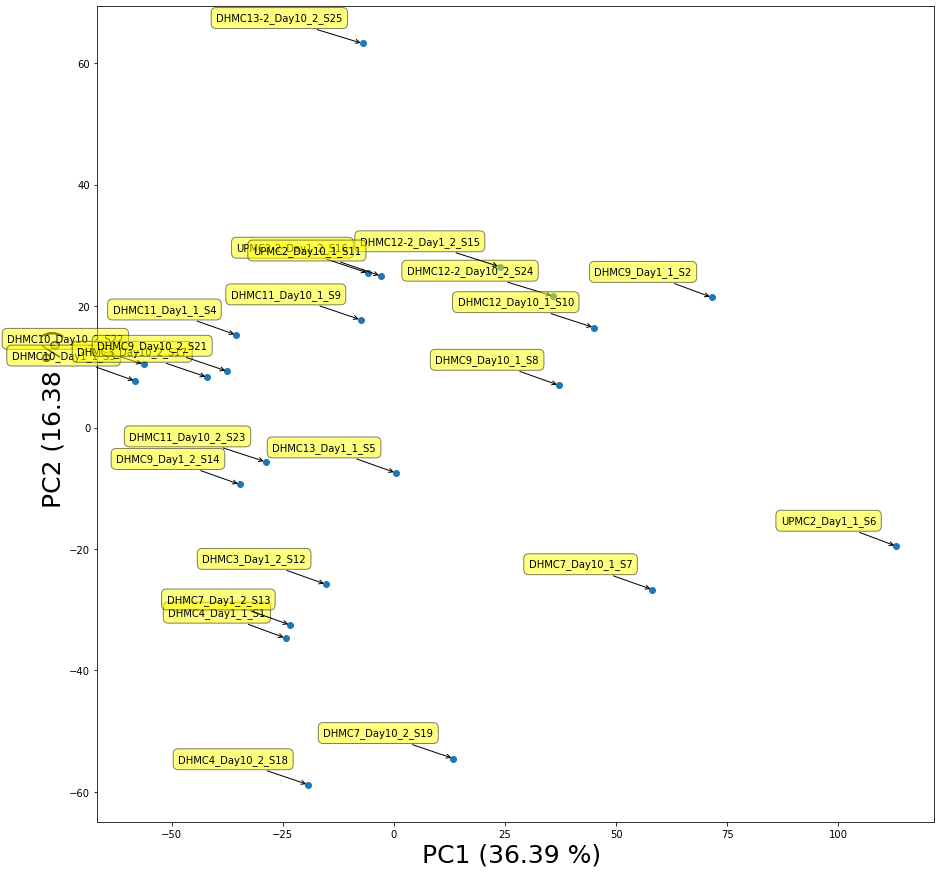

In [12]:
ax = plt.figure(figsize=(15,15)) # .gca(projection='3d')

labels = rpkms_log2.columns
plt.scatter(pca[0], pca[1])

for label, x, y in zip(labels, pca[0], pca[1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.xlabel('PC1 (%.2f %%) '%(sklearn_pca.explained_variance_ratio_[0]*100), fontsize=25)
plt.ylabel('PC2 (%.2f %%) '%(sklearn_pca.explained_variance_ratio_[1]*100), fontsize=25)
plt.show()

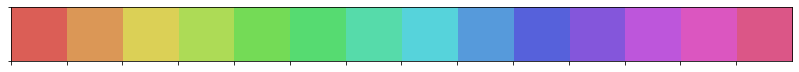

In [13]:
sns.palplot(sns.color_palette("hls", 14))

In [15]:
conditions = pd.read_table('/home/bay001/projects/human_HBOT_20161201/analysis/human_HBOT_merged/unused/df.all.txt')
conditions.index = [i.replace('_R1_001','').replace('.','-') for i in conditions.index]
conditions.to_csv('/projects/ps-yeolab3/bay001/codebase/data/ref_conditions.txt',sep='\t')

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [16]:
cols = sns.color_palette("hls", 14)

def get_size(row):
    if row['day'] == 'day1':
        return 50
    else:
        return 200
def get_patient(row):
    return cols[int(row['patient'].replace("DHMC","").replace("UPMC",""))]

def get_responder(row):
    """
    if responder: cols[0] (red)
    if non: cols[8]
    """
    if row['type'] == 'responder':
        return cols[0]
    else:
        return cols[8]
def get_treatment(row):
    if row['factors'] == 'HBOT':
        return 200
    else:
        return 50

pca.columns = ['x','y']
merged = pd.merge(pca,conditions,how='left',left_index=True,right_index=True)
merged['daysize'] = merged.apply(get_size,axis=1)
merged['patientcol'] = merged.apply(get_patient,axis=1)
merged['respondcol'] = merged.apply(get_responder,axis=1)
merged['treatmentnum'] = merged.apply(get_treatment,axis=1)
merged

,x,y,factors,type,day,patient,daysize,patientcol,respondcol,treatmentnum
DHMC10_Day10_2_S22,-56.302221,10.409962,sham,non,day10,DHMC10,200,"(0.5197714285714281, 0.33999999999999997, 0.86)","(0.33999999999999997, 0.6059428571428571, 0.86)",50
DHMC10_Day1_1_S3,-58.140172,7.655628,sham,non,day1,DHMC10,50,"(0.5197714285714281, 0.33999999999999997, 0.86)","(0.33999999999999997, 0.6059428571428571, 0.86)",50
DHMC11_Day10_1_S9,-7.450693,17.738736,sham,non,day10,DHMC11,200,"(0.7426285714285714, 0.33999999999999997, 0.86)","(0.33999999999999997, 0.6059428571428571, 0.86)",50
DHMC11_Day10_2_S23,-28.822544,-5.654732,sham,non,day10,DHMC11,200,"(0.7426285714285714, 0.33999999999999997, 0.86)","(0.33999999999999997, 0.6059428571428571, 0.86)",50
DHMC11_Day1_1_S4,-35.458120,15.244851,sham,non,day1,DHMC11,50,"(0.7426285714285714, 0.33999999999999997, 0.86)","(0.33999999999999997, 0.6059428571428571, 0.86)",50
DHMC12-2_Day10_2_S24,35.848334,21.635231,HBOT,responder,day10,DHMC12,200,"(0.86, 0.33999999999999997, 0.7545142857142858)","(0.86, 0.3712, 0.33999999999999997)",200
DHMC12-2_Day1_2_S15,23.819465,26.481587,HBOT,responder,day1,DHMC12,50,"(0.86, 0.33999999999999997, 0.7545142857142858)","(0.86, 0.3712, 0.33999999999999997)",200
DHMC12_Day10_1_S10,44.993476,16.454172,HBOT,responder,day10,DHMC12,200,"(0.86, 0.33999999999999997, 0.7545142857142858)","(0.86, 0.3712, 0.33999999999999997)",200
DHMC13-2_Day10_2_S25,-7.045569,63.256197,HBOT,responder,day10,DHMC13,200,"(0.86, 0.33999999999999997, 0.531657142857143)","(0.86, 0.3712, 0.33999999999999997)",200
DHMC13_Day1_1_S5,0.457832,-7.472492,HBOT,responder,day1,DHMC13,50,"(0.86, 0.33999999999999997, 0.531657142857143)","(0.86, 0.3712, 0.33999999999999997)",200


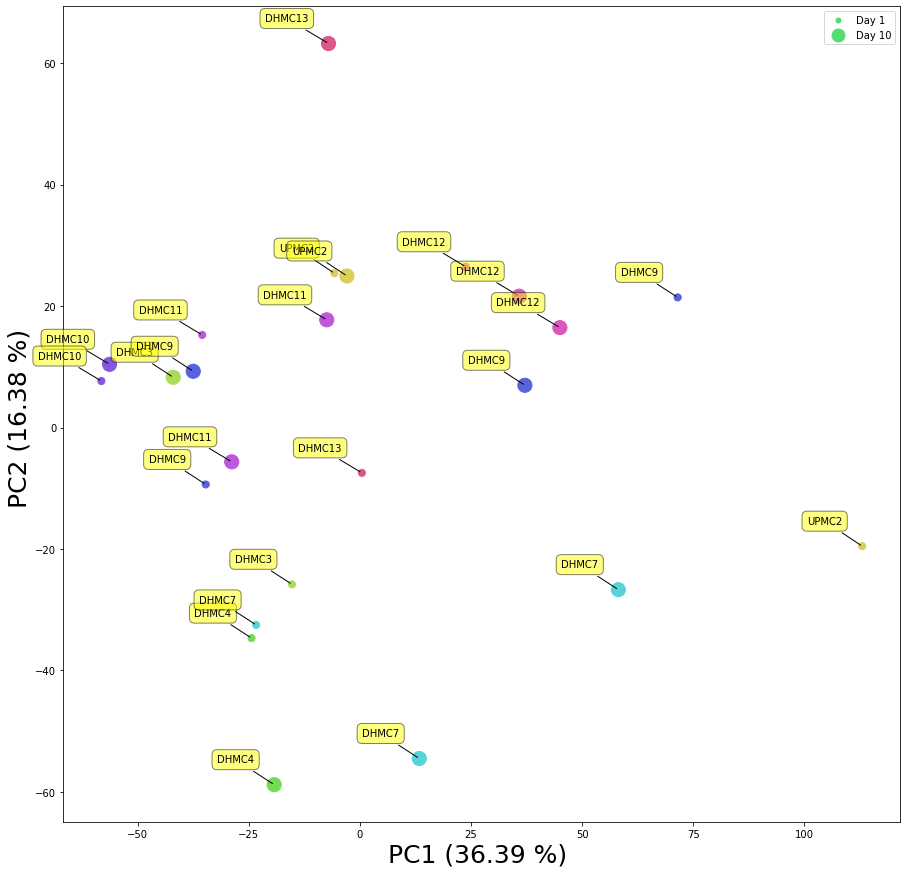

In [17]:
ax = plt.figure(figsize=(15,15)) # .gca(projection='3d')
plt.scatter(merged['x'],merged['y'],s=merged['daysize'],c=merged['patientcol'])
plt.xlabel('PC1 (%.2f %%) '%(sklearn_pca.explained_variance_ratio_[0]*100), fontsize=25)
plt.ylabel('PC2 (%.2f %%) '%(sklearn_pca.explained_variance_ratio_[1]*100), fontsize=25)
for label, x, y in zip(merged['patient'], merged['x'], merged['y']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=0'))
smallcircle = Line2D(range(1), range(1), color="white", marker='o',markersize=7,markerfacecolor=cols[5], label='Day 1')
largecircle = Line2D(range(1), range(1), color="white", marker='o',markersize=15,markerfacecolor=cols[5], label='Day 10')

plt.legend(handles=[smallcircle,largecircle])

plt.show()

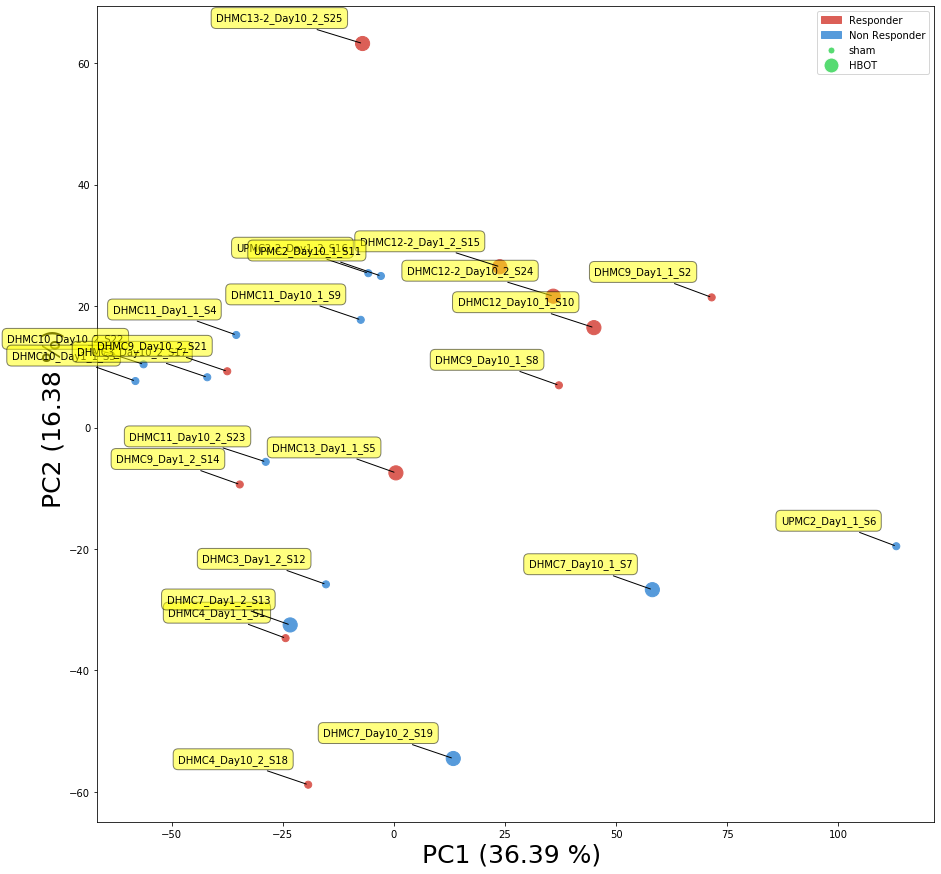

In [18]:
ax = plt.figure(figsize=(15,15)) # .gca(projection='3d')
plt.scatter(merged['x'],merged['y'],s=merged['treatmentnum'],c=merged['respondcol'])
plt.xlabel('PC1 (%.2f %%) '%(sklearn_pca.explained_variance_ratio_[0]*100), fontsize=25)
plt.ylabel('PC2 (%.2f %%) '%(sklearn_pca.explained_variance_ratio_[1]*100), fontsize=25)
for label, x, y in zip(merged.index, merged['x'], merged['y']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=0'))

    
red_patch = mpatches.Patch(color=cols[0], label='Responder')
yellow_patch = mpatches.Patch(color=cols[8], label='Non Responder')
smallcircle = Line2D(range(1), range(1), color="white", marker='o',markersize=7,markerfacecolor=cols[5], label='sham')
largecircle = Line2D(range(1), range(1), color="white", marker='o',markersize=15,markerfacecolor=cols[5], label='HBOT')

plt.legend(handles=[red_patch,yellow_patch,smallcircle,largecircle])


plt.show()

In [ ]:
merged

In [ ]:
X[:, 0]